# HH models

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
Ne=1500
Ni=400

In [3]:
re=np.random.rand(Ne,1)
ri=np.random.rand(Ni,1)

In [4]:
a=np.concatenate((0.02*np.ones((Ne,1)),0.02+0.02*ri),axis=0)
b=np.concatenate((0.2*np.ones((Ne,1)),0.25-0.05*ri),axis=0)
c=np.concatenate((-65+15*re**2,-65*np.ones((Ni,1))),axis=0)
d=np.concatenate((8-6*re**2,2*np.ones((Ni,1))),axis=0)
S=np.concatenate((0.5*np.random.rand(Ne+Ni,Ne),-np.random.rand(Ne+Ni,Ne)),axis=1)

In [5]:
v=-65*np.ones((Ne+Ni,1))
u=b*v

In [6]:
firings=np.empty((0,2),int)
for t in range(1,1000):
    I=np.concatenate((5*np.random.randn(Ne,1),2*np.random.randn(Ni,1)),axis=0)
    fired=np.where(v>=30)[0]
    if fired.size!=0:
        firings=np.concatenate((firings,np.concatenate((t+np.zeros((fired.size,1)),fired.reshape(-1,1)),axis=1)),axis=0)
        v[fired]=c[fired]
        u[fired]=u[fired]+d[fired]
        I=I+np.sum(S[:,fired],axis=1).reshape(-1,1)
    v=v+0.5*(0.04*v**2+5*v+140-u+I)
    v=v+0.5*(0.04*v**2+5*v+140-u+I)
    u=u+a*(b*v-u)

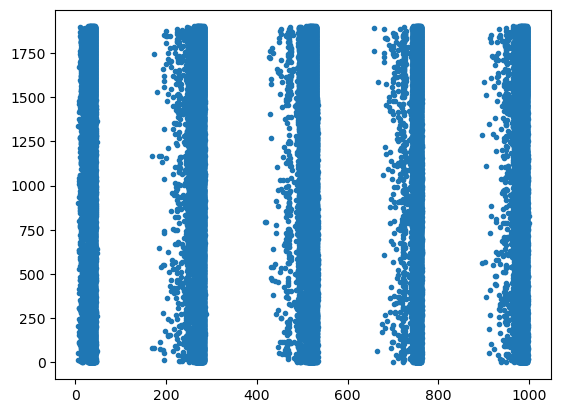

In [7]:
plt.plot(firings[:,0],firings[:,1],'.')